In [36]:
import legacy
import dnnlib
import torch
import PIL.Image
from IPython.display import Image as IPImage

network_pkl = '../pretrained-weights/ffhq.pkl'
device = torch.device('cuda')
with dnnlib.util.open_url(network_pkl) as f:
    G = legacy.load_network_pkl(f)['G_ema'].to(device)

/home/zack/.local/lib/python3.10/site-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(io.BytesIO(b))


In [37]:
import numpy as np

w = np.load('sir.npy')
w = torch.tensor(w, device=device).unsqueeze(0)

w2 = np.load('image_latent.npy')
w2 = torch.tensor(w2, device=device).unsqueeze(0)

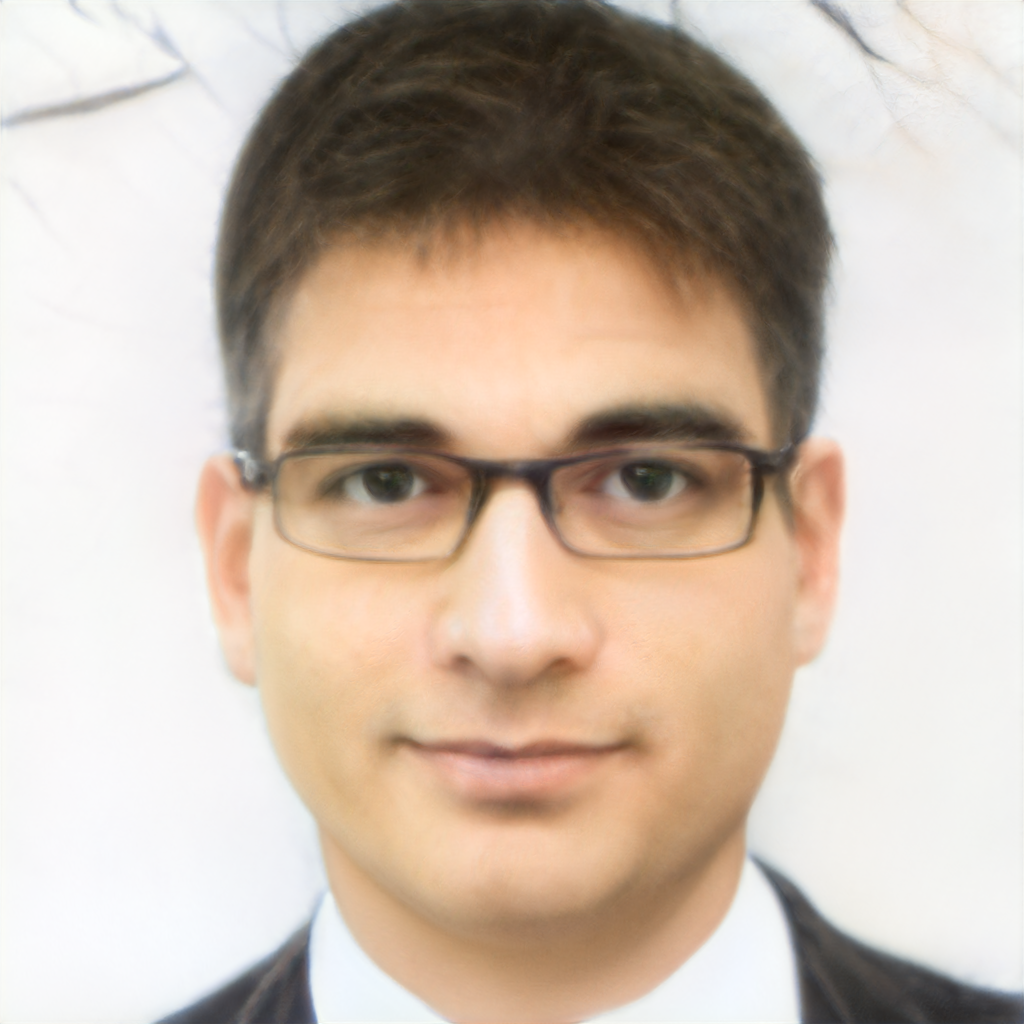

In [39]:
synth_image = G.synthesis(w, noise_mode='const')
synth_image = (synth_image + 1) * (255/2)
synth_image = synth_image.permute(0, 2, 3, 1).clamp(0, 255).to(torch.uint8)[0].cpu().numpy()

PIL.Image.fromarray(synth_image, 'RGB').save('regenerated_image.png')
IPImage('regenerated_image.png')

In [44]:
def generate_edited_image(w, perturbation_scale=0.1):
    # Add random perturbation to the latent vector
    perturbation = torch.randn_like(w) * perturbation_scale
    edited_w = w + perturbation
    
    # Generate image from edited latent vector
    synth_image = G.synthesis(edited_w, noise_mode='const')
    synth_image = (synth_image + 1) * (255/2)
    synth_image = synth_image.permute(0, 2, 3, 1).clamp(0, 255).to(torch.uint8)[0].cpu().numpy()
    return synth_image

# Generate and save multiple edited versions
for i in range(5):  # Generate 5 edited versions
    edited_image = generate_edited_image(w)
    PIL.Image.fromarray(edited_image, 'RGB').save(f'edits/edited_image_{i}.png')

SyntaxError: cannot assign to expression (406272454.py, line 12)